In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from pathlib import Path
from sklearn.model_selection import train_test_split

In [153]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [154]:
data_path = Path().resolve().parent / "data"

data = pd.read_csv(data_path/"arbres_grenoble_epsg4326.csv")

In [155]:
data.head()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,25301,ESP30399,AR30399,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP761,...,NaN,NaN,Ville de Grenoble,NaN,NaN,NaN,Ville de Grenoble,NaN,NaN,"45.164519466065315,5.7364309029098335"
1,17909,ESP5185,AR5185,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP761,...,NaN,NaN,Ville de Grenoble,NaN,NaN,NaN,Ville de Grenoble,NaN,NaN,"45.16450876797978,5.736451624755175"
2,28960,ESP16027,AR16027,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP761,...,NaN,NaN,Ville de Grenoble,NaN,NaN,NaN,Ville de Grenoble,NaN,NaN,"45.164556703715526,5.736307688353201"
3,14246,ESP17702,AR17702,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP761,...,NaN,NaN,Ville de Grenoble,NaN,NaN,NaN,Ville de Grenoble,NaN,NaN,"45.164533444541846,5.736391508663688"
4,45677,ESP41299,AR41299,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"45.18330787379752,5.709045164969469"


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31895 entries, 0 to 31894
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          31895 non-null  int64  
 1   code                   31895 non-null  object 
 2   nom                    31895 non-null  object 
 3   genre                  31895 non-null  object 
 4   genre_desc             31895 non-null  object 
 5   categorie              31895 non-null  object 
 6   categorie_desc         31895 non-null  object 
 7   sous_categorie         31895 non-null  object 
 8   sous_categorie_desc    31895 non-null  object 
 9   code_parent            31895 non-null  object 
 10  code_parent_desc       31895 non-null  object 
 11  adr_secteur            31895 non-null  int64  
 12  bien_reference         31895 non-null  object 
 13  genre_bota             31079 non-null  object 
 14  espece                 29415 non-null  object 
 15  va

In [157]:
arbres_df = data[data['anneedeplantation'].notnull()].reset_index(drop=True)
anne_null = data[data['anneedeplantation'].isnull()].reset_index(drop=True)

In [158]:
arbres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29756 entries, 0 to 29755
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          29756 non-null  int64  
 1   code                   29756 non-null  object 
 2   nom                    29756 non-null  object 
 3   genre                  29756 non-null  object 
 4   genre_desc             29756 non-null  object 
 5   categorie              29756 non-null  object 
 6   categorie_desc         29756 non-null  object 
 7   sous_categorie         29756 non-null  object 
 8   sous_categorie_desc    29756 non-null  object 
 9   code_parent            29756 non-null  object 
 10  code_parent_desc       29756 non-null  object 
 11  adr_secteur            29756 non-null  int64  
 12  bien_reference         29756 non-null  object 
 13  genre_bota             29716 non-null  object 
 14  espece                 28378 non-null  object 
 15  va

In [159]:
arbres_df.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,29756.000000,29756.000000,0.0,29756.000000,0.0,592.000000,0.0,0.0,0.0,0.0
mean,19438.515392,252.977551,NaN,1990.402037,NaN,88.087838,NaN,NaN,NaN,NaN
std,12111.760070,3075.731911,NaN,18.154057,NaN,61.006469,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9288.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,18688.500000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,28090.250000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,48322.000000,38421.000000,NaN,2024.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [160]:
train_set, test_set = train_test_split(arbres_df, test_size=0.2, random_state=42)

In [161]:
train_set.reset_index(inplace=True, drop=True)
test_set.reset_index(inplace=True, drop=True)

In [164]:
train_vis = train_set.copy().reset_index(drop=True)

<Axes: xlabel='lat', ylabel='lon'>

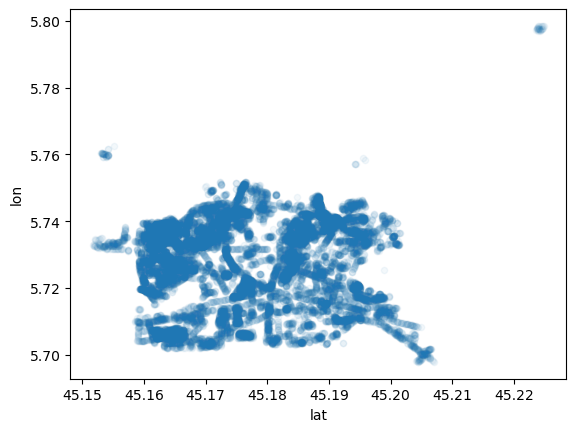

In [165]:
train_vis[["lat", "lon"]] = [ast.literal_eval(x)[:2] for x in train_vis["geo_point_2d"]]
train_vis.drop("geo_point_2d", axis=1, inplace=True)
train_vis.plot(kind="scatter", x="lat", y="lon", alpha=0.05)

<Axes: >

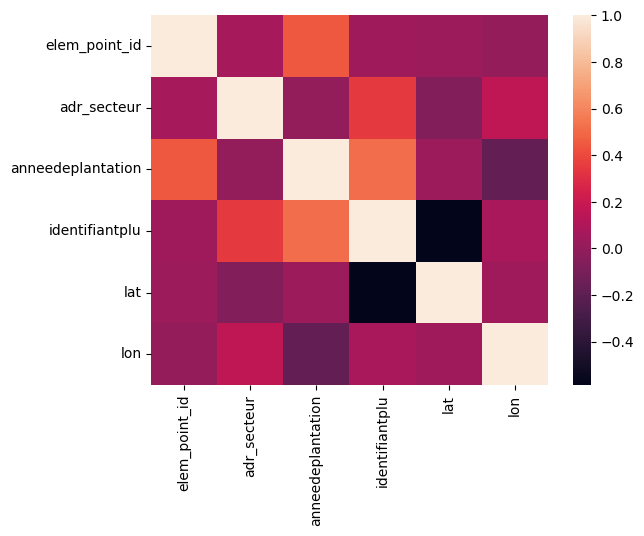

In [166]:
train_vis.dropna(axis=1, how="all", inplace=True)
corr_matrix = train_vis.corr(numeric_only=True)
sns.heatmap(corr_matrix)

In [167]:
train_feat = train_set.drop("anneedeplantation", axis=1).reset_index(drop=True)
train_target = train_set["anneedeplantation"].copy().reset_index(drop=True)

In [168]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23804 entries, 0 to 23803
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          23804 non-null  int64  
 1   code                   23804 non-null  object 
 2   nom                    23804 non-null  object 
 3   genre                  23804 non-null  object 
 4   genre_desc             23804 non-null  object 
 5   categorie              23804 non-null  object 
 6   categorie_desc         23804 non-null  object 
 7   sous_categorie         23804 non-null  object 
 8   sous_categorie_desc    23804 non-null  object 
 9   code_parent            23804 non-null  object 
 10  code_parent_desc       23804 non-null  object 
 11  adr_secteur            23804 non-null  int64  
 12  bien_reference         23804 non-null  object 
 13  genre_bota             23772 non-null  object 
 14  espece                 22686 non-null  object 
 15  va

In [169]:
columns_to_drop = ["elem_point_id", "code", "nom", "genre", "genre_desc", "categorie",
                   "categorie_desc", "sous_categorie_desc", "code_parent", "code_parent_desc",
                   "bien_reference", "genre_bota", "espece", "variete", "equipe", "remarques",
                   "courrier", "identifiantplu", "typeimplantationplu", "intituleprotectionplu",
                   "anneeabattage", "essouchement", "diametrearbre", "causeabattage",
                   "stationmetro", "forme", "typenature", "traitementchenilles"]

train_feat.drop(columns_to_drop, axis=1, inplace=True)

In [170]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23804 entries, 0 to 23803
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sous_categorie        23804 non-null  object
 1   adr_secteur           23804 non-null  int64 
 2   stadededeveloppement  21771 non-null  object
 3   raisondeplantation    2644 non-null   object
 4   collectivite          23727 non-null  object
 5   hauteurarbre          15658 non-null  object
 6   portarbre             10846 non-null  object
 7   structure             23680 non-null  object
 8   geo_point_2d          23804 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [171]:
train_feat[["stadededeveloppement", "raisondeplantation", "collectivite", "hauteurarbre", "portarbre", "structure"]]

,stadededeveloppement,raisondeplantation,collectivite,hauteurarbre,portarbre,structure
0,NaN,Nouveau,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble
1,Arbre jeune,Nouveau,Ville de Grenoble,NaN,NaN,Ville de Grenoble
2,Arbre adulte,NaN,Ville de Grenoble,NaN,NaN,Ville de Grenoble
3,Arbre adulte,NaN,Ville de Grenoble,de 10 m à 20 m,Libre,Ville de Grenoble
4,Arbre adulte,NaN,Ville de Grenoble,NaN,NaN,Ville de Grenoble
...,...,...,...,...,...,...
23799,Arbre jeune,NaN,Grenoble Alpes Métropole,Moins de 10 m,Semi-libre,Métropole de Grenoble
23800,Arbre vieillissant,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble
23801,Arbre jeune,Nouveau,Grenoble Alpes Métropole,Moins de 10 m,NaN,Métropole de Grenoble
23802,Arbre adulte,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble


In [172]:
train_feat["portarbre"].value_counts(dropna=False)

portarbre
NaN             12958
Libre            6070
Semi-libre       4449
Architecturé      316
Pyramidale          7
Pleureur            4
Name: count, dtype: int64

In [173]:
data["sous_categorie"].value_counts(dropna=False)

sous_categorie
ESP174    15397
ESP151    12498
ESP065     2500
ESP187     1500
Name: count, dtype: int64

In [174]:
data.pivot_table(index='raisondeplantation', columns='sous_categorie', aggfunc='size')

sous_categorie,ESP065,ESP151,ESP174,ESP187
raisondeplantation,,,,
Existant,1.0,1.0,1.0,NaN
Nouveau,52.0,1312.0,1469.0,65.0
Remplacement,18.0,282.0,88.0,NaN


In [175]:
train_feat["stadededeveloppement"]

0                       NaN
1               Arbre jeune
2              Arbre adulte
3              Arbre adulte
4              Arbre adulte
                ...        
23799           Arbre jeune
23800    Arbre vieillissant
23801           Arbre jeune
23802          Arbre adulte
23803          Arbre adulte
Name: stadededeveloppement, Length: 23804, dtype: object

In [176]:
train_feat["stadededeveloppement"] = train_feat["stadededeveloppement"].fillna(value="Arbre adulte")

In [177]:
train_feat["portarbre"].value_counts(dropna=False)

portarbre
NaN             12958
Libre            6070
Semi-libre       4449
Architecturé      316
Pyramidale          7
Pleureur            4
Name: count, dtype: int64

In [178]:
mode_df = train_feat.groupby("adr_secteur")["portarbre"].agg(lambda x: x.mode().max()).reset_index()
mode_df.columns = ["adr_secteur", "mode_portarbre"]

for index, row in mode_df.iterrows():

    feat_value = row["adr_secteur"]
    mode_value = row["mode_portarbre"]
    train_feat.loc[train_feat["adr_secteur"] == feat_value, "portarbre"] = \
        train_feat.loc[train_feat["adr_secteur"] == feat_value, "portarbre"].fillna(value=mode_value)

/tmp/ipykernel_5334/3066127487.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_feat.loc[train_feat["adr_secteur"] == feat_value, "portarbre"].fillna(value=mode_value)
/tmp/ipykernel_5334/3066127487.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_feat.loc[train_feat["adr_secteur"] == feat_value, "portarbre"].fillna(value=mode_value)
/tmp/ipykernel_5334/3066127487.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instea

In [179]:
train_feat["raisondeplantation"].value_counts(dropna=False)

raisondeplantation
NaN             21160
Nouveau          2326
Remplacement      317
Existant            1
Name: count, dtype: int64

In [180]:
mode_df = train_feat.groupby("sous_categorie")["raisondeplantation"].agg(lambda x: x.mode().max()).reset_index()
mode_df.columns = ["sous_categorie", "mode_raison"]

for index, row in mode_df.iterrows():

    feat_value = row["sous_categorie"]
    mode_value = row["mode_raison"]
    train_feat.loc[train_feat["sous_categorie"] == feat_value, "raisondeplantation"] = \
        train_feat.loc[train_feat["sous_categorie"] == feat_value, "raisondeplantation"].fillna(value=mode_value)

In [181]:
data.pivot_table(index='collectivite', columns='sous_categorie', aggfunc='size')

sous_categorie,ESP065,ESP151,ESP174,ESP187
collectivite,,,,
Grenoble Alpes Métropole,77,10994,4130,50
Ville de Grenoble,2288,1231,10968,1450


In [182]:
mode_df = train_feat.groupby("sous_categorie")["collectivite"].agg(lambda x: x.mode().max()).reset_index()
mode_df.columns = ["sous_categorie", "mode_collec"]

for index, row in mode_df.iterrows():

    feat_value = row["sous_categorie"]
    mode_value = row["mode_collec"]
    train_feat.loc[train_feat["sous_categorie"] == feat_value, "collectivite"] = \
        train_feat.loc[train_feat["sous_categorie"] == feat_value, "collectivite"].fillna(value=mode_value)

In [183]:
data.pivot_table(index='hauteurarbre', columns='stadededeveloppement', aggfunc='size')

stadededeveloppement,Arbre adulte,Arbre jeune,Arbre vieillissant
hauteurarbre,,,
Moins de 10 m,4312,2788,125
Plus de 20 m,1783,1,296
de 10 m à 20 m,8124,585,358


In [184]:
mode_df = train_feat.groupby("stadededeveloppement")["hauteurarbre"].agg(lambda x: x.mode().max()).reset_index()
mode_df.columns = ["stadededeveloppement", "mode_haut"]

for index, row in mode_df.iterrows():

    feat_value = row["stadededeveloppement"]
    mode_value = row["mode_haut"]
    train_feat.loc[train_feat["stadededeveloppement"] == feat_value, "hauteurarbre"] = \
        train_feat.loc[train_feat["stadededeveloppement"] == feat_value, "hauteurarbre"].fillna(value=mode_value)

In [185]:
mode_df = train_feat.groupby("sous_categorie")["structure"].agg(lambda x: x.mode().max()).reset_index()
mode_df.columns = ["sous_categorie", "mode_struc"]

for index, row in mode_df.iterrows():

    feat_value = row["sous_categorie"]
    mode_value = row["mode_struc"]
    train_feat.loc[train_feat["sous_categorie"] == feat_value, "structure"] = \
        train_feat.loc[train_feat["sous_categorie"] == feat_value, "structure"].fillna(value=mode_value)

In [186]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23804 entries, 0 to 23803
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sous_categorie        23804 non-null  object
 1   adr_secteur           23804 non-null  int64 
 2   stadededeveloppement  23804 non-null  object
 3   raisondeplantation    23804 non-null  object
 4   collectivite          23804 non-null  object
 5   hauteurarbre          23804 non-null  object
 6   portarbre             23731 non-null  object
 7   structure             23804 non-null  object
 8   geo_point_2d          23804 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [187]:
train_feat.dropna(inplace=True)
train_feat.reset_index(drop=True, inplace=True)
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23731 entries, 0 to 23730
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sous_categorie        23731 non-null  object
 1   adr_secteur           23731 non-null  int64 
 2   stadededeveloppement  23731 non-null  object
 3   raisondeplantation    23731 non-null  object
 4   collectivite          23731 non-null  object
 5   hauteurarbre          23731 non-null  object
 6   portarbre             23731 non-null  object
 7   structure             23731 non-null  object
 8   geo_point_2d          23731 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [201]:
train_feat["hauteurarbre"].value_counts()

hauteurarbre
de 10 m à 20 m    13146
Moins de 10 m      8964
Plus de 20 m       1621
Name: count, dtype: int64

In [188]:
train_feat.to_pickle(data_path/"train_feat.pkl")
train_target.to_pickle(data_path/"train_target.pkl")
test_set.to_pickle(data_path/"test_set.pkl")
anne_null.to_pickle(data_path/"anne_null.pkl")